# Lag Features and Moving Averages in Time Series

In this notebook, we explore how to create **lag-based features** and calculate **moving averages** — essential tools for analyzing and modeling time series data.

We use the **AirPassengers** dataset for monthly airline passenger totals.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


**Dataset:**

Air passengers data 

In [17]:
data = pd.read_csv('/kaggle/input/airpassengers-dataframe/AirPassengers.csv')

In [18]:
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


Adding the year manually because that data is missing in the actually data

In [19]:
data['Year'] = list(range(1949, 1949 + len(data)))

In [20]:
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,112,118,132,129,121,135,148,148,136,119,104,118,1949
1,115,126,141,135,125,149,170,170,158,133,114,140,1950
2,145,150,178,163,172,178,199,199,184,162,146,166,1951
3,171,180,193,181,183,218,230,242,209,191,172,194,1952
4,196,196,236,235,229,243,264,272,237,211,180,201,1953


changing the format of the data for proper analysis

In [21]:
df = data.melt(id_vars='Year', var_name='Month', value_name='Passengers')

In [22]:
df.head()

,Year,Month,Passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196


conversion of year and month to proper data because timeseries works better on the datatime format data

In [23]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df.set_index('Date', inplace=True)
df = df[['Passengers']]

In [24]:
df.head()

,Passengers
Date,
1949-01-01,112
1950-01-01,115
1951-01-01,145
1952-01-01,171
1953-01-01,196


**Create Lag Feature with `.shift()`**

Lag features help us include **past values** as predictors.


In [28]:
df['Lag_1'] = df['Passengers'].shift(1)

**Simple Moving Average (SMA) with .rolling()**

A Simple Moving Average smooths the series by averaging over a window.

In [29]:
df['SMA_3'] = df['Passengers'].rolling(window=3).mean()

**Exponential Moving Average (EMA) with .ewm()**

Unlike SMA, EMA gives more weight to recent values, reacting faster to changes.

In [30]:
df['EMA_3'] = df['Passengers'].ewm(span=3, adjust=False).mean()

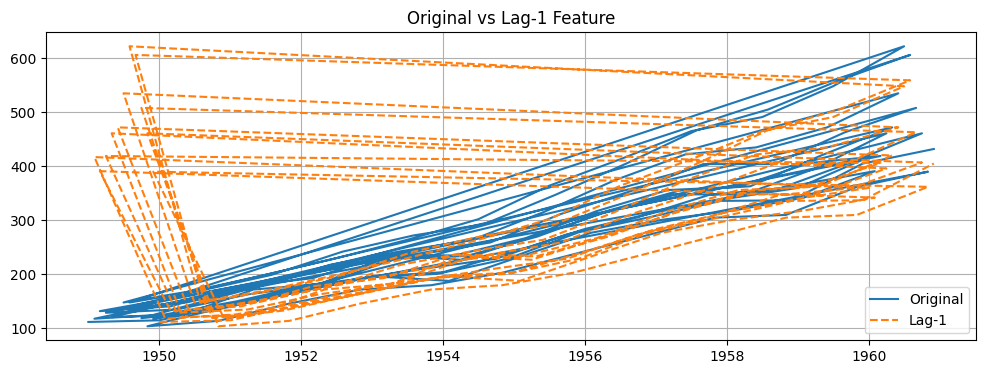

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Lag_1'], label='Lag-1', linestyle='--')
plt.title("Original vs Lag-1 Feature")
plt.legend()
plt.grid(True)
plt.show()


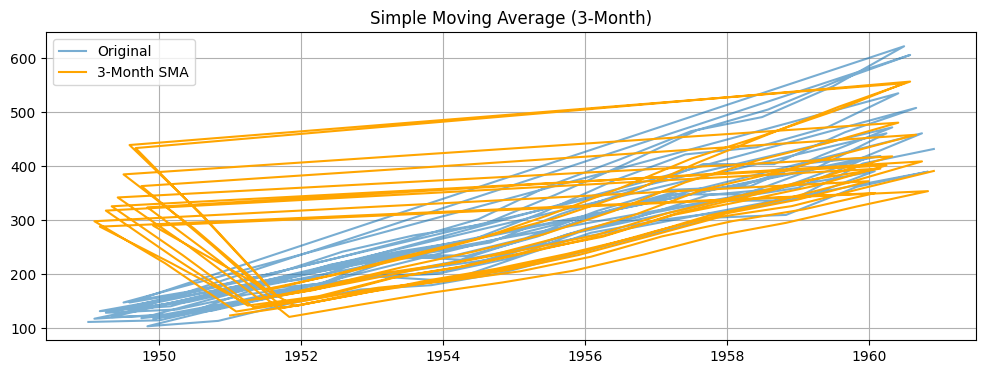

In [33]:
plt.figure(figsize=(12, 4))
plt.plot(df['Passengers'], label='Original', alpha=0.6)
plt.plot(df['SMA_3'], label='3-Month SMA', color='orange')
plt.title("Simple Moving Average (3-Month)")
plt.legend()
plt.grid(True)
plt.show()

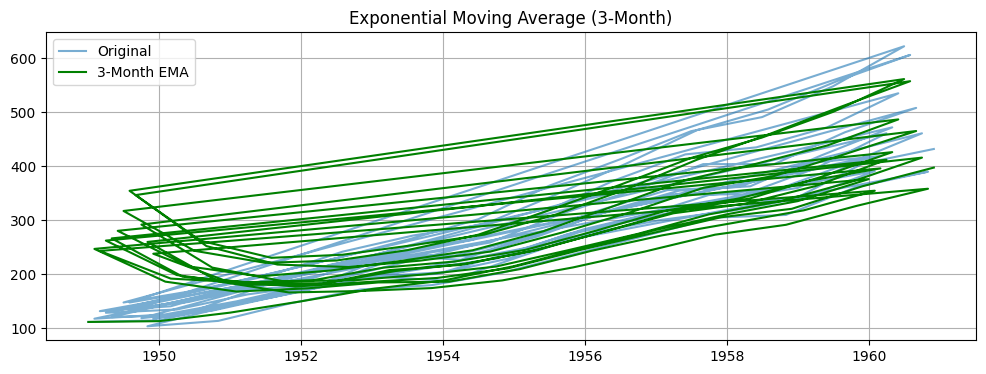

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(df['Passengers'], label='Original', alpha=0.6)
plt.plot(df['EMA_3'], label='3-Month EMA', color='green')
plt.title("Exponential Moving Average (3-Month)")
plt.legend()
plt.grid(True)
plt.show()


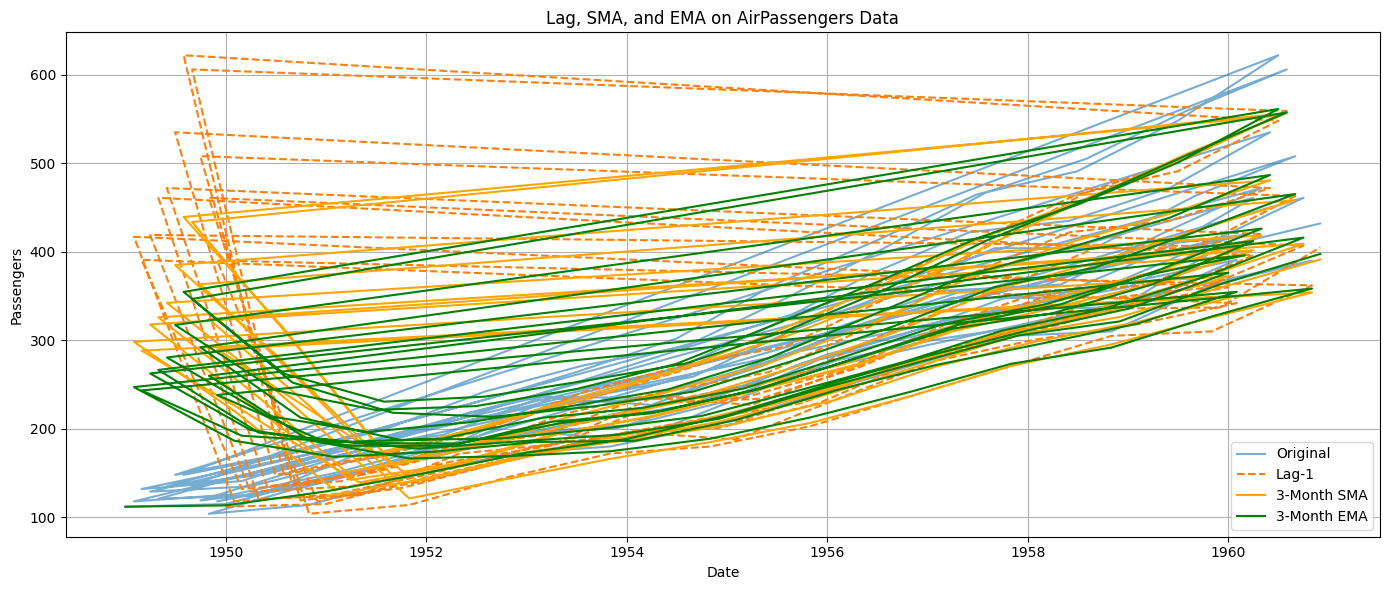

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(df['Passengers'], label='Original', alpha=0.6)
plt.plot(df['Lag_1'], label='Lag-1', linestyle='--')
plt.plot(df['SMA_3'], label='3-Month SMA', color='orange')
plt.plot(df['EMA_3'], label='3-Month EMA', color='green')
plt.title('Lag, SMA, and EMA on AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
